In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("sales_data.csv")
df


,Order ID,Order Date,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Pv-9314-65558,2023-12-11,East,Technology,Copiers,411.62,6,0.1,64.47
1,TH-6605-35179,2024-07-10,Central,Furniture,Tables,879.79,1,0.3,83.93
2,JO-3567-07451,2025-01-02,South,Furniture,Tables,167.31,9,0.0,18.19
3,zg-1236-77866,2024-12-08,Central,Technology,Accessories,315.36,7,0.1,63.72
4,ld-0301-37239,2024-12-27,West,Technology,Phones,848.12,8,0.3,110.76
...,...,...,...,...,...,...,...,...,...
495,AE-5356-47393,2024-04-18,West,Office Supplies,Paper,264.38,7,0.2,19.92
496,BL-8517-83437,2023-09-27,Central,Furniture,Chairs,856.76,4,0.1,119.78
497,fm-2680-04253,2025-01-10,East,Furniture,Bookcases,338.90,8,0.1,38.70
498,vn-9801-60825,2025-02-10,East,Furniture,Bookcases,449.73,9,0.2,64.31


In [5]:
df.shape 
df.isnull().sum() 
df.dtypes  

Order ID         object
Order Date       object
Region           object
Category         object
Sub-Category     object
Sales           float64
Quantity          int64
Discount        float64
Profit          float64
dtype: object

In [7]:
df = df.drop_duplicates()
df.fillna(df.mean(numeric_only=True), inplace=True)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df

,Order ID,Order Date,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Pv-9314-65558,2023-12-11,East,Technology,Copiers,411.62,6,0.1,64.47
1,TH-6605-35179,2024-07-10,Central,Furniture,Tables,879.79,1,0.3,83.93
2,JO-3567-07451,2025-01-02,South,Furniture,Tables,167.31,9,0.0,18.19
3,zg-1236-77866,2024-12-08,Central,Technology,Accessories,315.36,7,0.1,63.72
4,ld-0301-37239,2024-12-27,West,Technology,Phones,848.12,8,0.3,110.76
...,...,...,...,...,...,...,...,...,...
495,AE-5356-47393,2024-04-18,West,Office Supplies,Paper,264.38,7,0.2,19.92
496,BL-8517-83437,2023-09-27,Central,Furniture,Chairs,856.76,4,0.1,119.78
497,fm-2680-04253,2025-01-10,East,Furniture,Bookcases,338.90,8,0.1,38.70
498,vn-9801-60825,2025-02-10,East,Furniture,Bookcases,449.73,9,0.2,64.31


<Axes: xlabel='Order Date'>

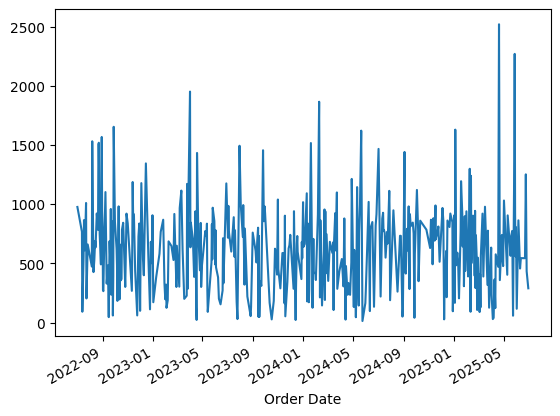

In [8]:
df.groupby('Order Date')['Sales'].sum().plot()


<Axes: xlabel='Discount', ylabel='Profit'>

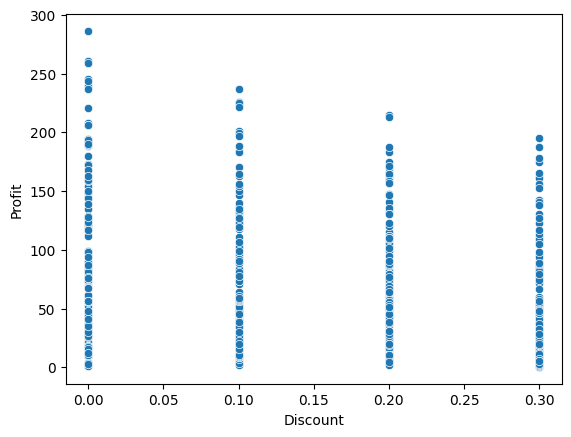

In [9]:
sns.scatterplot(x='Discount', y='Profit', data=df)


<Axes: xlabel='Region'>

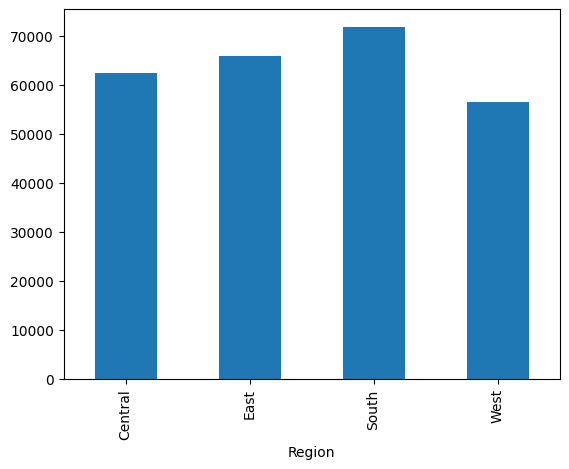

In [10]:
df.groupby('Region')['Sales'].sum().plot(kind='bar')


<Axes: ylabel='Sales'>

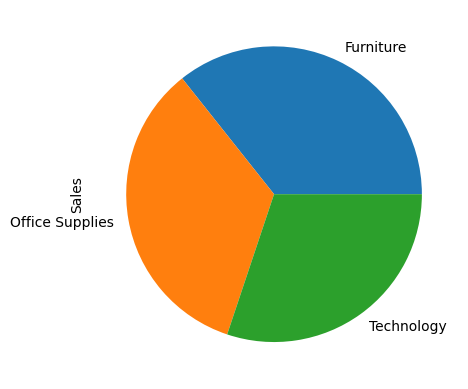

In [11]:
df.groupby('Category')['Sales'].sum().plot(kind='pie')


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

X = df[['Profit', 'Discount']]
y = df['Sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [17]:

print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

results_df = pd.DataFrame({
    'Actual Sales': y_test.values,
    'Predicted Sales': y_pred
})


print(results_df.head(10))


Coefficients: [  3.69198144 372.81833438]
Intercept: 178.973200029969
   Actual Sales  Predicted Sales
0        428.32       540.861221
1        321.09       426.019061
2         89.53       262.626320
3        611.23       489.668821
4        921.39       661.057778
5        806.46       675.581623
6        986.80       947.599637
7        865.28       630.008214
8         30.19       242.061984
9        204.38       281.307746
